# *Exercise 2: PCA*

## Synthetic Data

In [196]:
import numpy as np
import numpy.linalg as lg
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 6)
A = s.reshape(3,2); print("The matrix A is: \n", A)
print("\nThe rank of this matrix is", lg.matrix_rank(A))

The matrix A is: 
 [[ 0.41187162  0.11522386]
 [ 0.02180195 -0.52017991]
 [ 0.693338    2.26262089]]

The rank of this matrix is 2


### Generation of Dataset #1 

In [197]:
V = np.zeros(shape=(2,500));
for i in range(500):
    v = np.random.normal(mu,sigma,2)
    V[:,i] = v
X = np.matmul(A,V)
print(X)
print("The shape of X is: ", X.shape)
print("The rank of X is: ", lg.matrix_rank(X))

[[-0.6563629   0.51798102 -0.30039571 ... -0.16832278  0.4068017
   0.05068972]
 [ 0.10543032 -0.09004746  0.22274259 ...  0.35250258 -0.51954993
   0.62177312]
 [-1.65589566  1.33368731 -1.44372231 ... -1.70396263  2.81165002
  -2.34813759]]
The shape of X is:  (3, 500)
The rank of X is:  2


### Singular Value and Eigenvalue Decomposition of Dataset #1

In [198]:
import numpy.linalg as lg
U,s,Vt = lg.svd(X)
Xt = np.transpose(X)
XXt = np.matmul(X,Xt)
w, eigv = lg.eig(XXt)
print ("The left singular vectors of X are: \n", U)
print ("The eigenvectors of XX^T are: \n", eigv)
print ("The singular values of X are: \n",s)
print ("The square of the singular values of X: \n", np.square(s))
print ("The eigenvalues of XX^T are: \n",w)
print("The energy of X is: ", lg.norm(X)**2)
fsum = 0
for i in range(len(s)):
    fsum+= s[i]**2
print("The sum of the squares of the singular values is: ", fsum)

The left singular vectors of X are: 
 [[-0.09891541 -0.90088152 -0.42264433]
 [ 0.20037543 -0.43405954  0.87831771]
 [-0.974713    0.00219162  0.22344969]]
The eigenvectors of XX^T are: 
 [[-0.09891541  0.90088152 -0.42264433]
 [ 0.20037543  0.43405954  0.87831771]
 [-0.974713   -0.00219162  0.22344969]]
The singular values of X are: 
 [5.08715877e+01 9.19849842e+00 1.31163250e-15]
The square of the singular values of X: 
 [2.58791844e+03 8.46123731e+01 1.72037981e-30]
The eigenvalues of XX^T are: 
 [ 2.58791844e+03  8.46123731e+01 -8.46551176e-14]
The energy of X is:  2672.5308086106324
The sum of the squares of the singular values is:  2672.530808610631


There are effectively 2 non-zero singular values from the results above. The third singular value is several orders of magnitude lesser than the first two so we may disregard it.

The left singular vectors of X corresponding to the two largest singular values identify the two principal components of the columns of X. The singular matrix U tells us the "directions" in which the data has the most variation. Both matrix A and X have rank 2, which mean they both span $R^2$, which corresponds to the 2 principal components.

### PCA of Dataset #1

1. As mentioned above, we require only two principal components to capture the variation or degrees of freedom within the data. Matrix U gives us the two orthonormal vectors indicating where the data primarily lies. The two "non-zero" singular values give us the strength or magnitude to which the two correspoding vectors represent the data.

2. Mean and Expected Value

In [199]:
import random as rand
k = rand.randint(0,499)
xk= X[:,k]
print(f"Selecting {k}th vector from X: ")
print (xk)
Exk = (1/3)*(xk[0]+xk[1]+xk[2])
print("The expected value is: ",Exk)
m = np.mean(X,axis=1)
print ("The mean vector m is: \n",m)

Selecting 227th vector from X: 
[-0.02061879 -0.95445491  3.71269355]
The expected value is:  0.9125399489126409
The mean vector m is: 
 [-0.00485491 -0.01275355  0.04094777]


3. Top 2 Principal Components

In [200]:
Unew = np.delete(U,2,1)
print(Unew)
u1 = Unew[:,0]; u2 = Unew[:,1]

[[-0.09891541 -0.90088152]
 [ 0.20037543 -0.43405954]
 [-0.974713    0.00219162]]


4. Compute feature vectors x~i from data samples xi by projecting data onto the top two principal components of X.

In [201]:
Xtilda = np.transpose(Unew).dot(X)
print("Shape of X~ is ",Xtilda.shape)
Xhat = Unew.dot(Xtilda)
print ("Xhat is: \n",Xhat,"\n with shape: ", Xhat.shape)
print("The representation error is: ",lg.norm(Xhat-X)**2)

Shape of X~ is  (2, 500)
Xhat is: 
 [[-0.6563629   0.51798102 -0.30039571 ... -0.16832278  0.4068017
   0.05068972]
 [ 0.10543032 -0.09004746  0.22274259 ...  0.35250258 -0.51954993
   0.62177312]
 [-1.65589566  1.33368731 -1.44372231 ... -1.70396263  2.81165002
  -2.34813759]] 
 with shape:  (3, 500)
The representation error is:  2.532170365560544e-28


5. Now compute feature vectors x~i from data samples xi by projecting data onto the top principal component of X.

In [202]:
u1 = np.reshape(u1,(1,3))
Xtilda1 = u1.dot(X)
print("Shape of X~ is ",Xtilda1.shape)
u1 = np.reshape(u1,(3,1))
Xhat1 = u1.dot(Xtilda1)
print("Shape of Xhat is ",Xhat1.shape)
print("The representation error is: ",lg.norm(Xhat1-X)**2)
print("The square of the second-largest singular value of X is: ",s[1]**2)

Shape of X~ is  (1, 500)
Shape of Xhat is  (3, 500)
The representation error is:  84.6123731025488
The square of the second-largest singular value of X is:  84.61237310254877


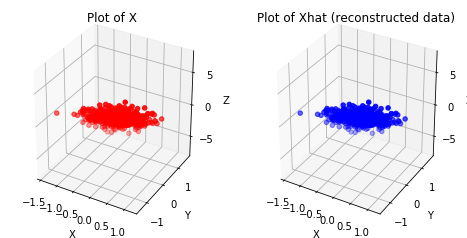

In [203]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pts = X.transpose()
x,y,z = zip(*pts)
fig = plt.figure(figsize=plt.figaspect(0.5))
#fig, (ax,ax2) = plt.subplots(2, 1, constrained_layout=True,projection='3d')
ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.set_title("Plot of X")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#fig2 = plt.figure()
ax2 = fig.add_subplot(1,2,2, projection='3d')
pts2 = Xhat1.transpose()
x2,y2,z2 = zip(*pts)
ax2.scatter(x2, y2, z2, c='b', marker='o')
ax2.set_title("Plot of Xhat (reconstructed data)")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

### Generation of Dataset 2

In [228]:
import random as rand
import numpy.linalg as lg

# Generating X
c = np.random.normal(mu,sigma,3)
print("vector c is: \n",c)
X = np.zeros(shape=(3,500))
for i in range(500):
    v = np.random.normal(mu,sigma,2)
    X[:,i] = A.dot(v)+c
    
print("The shape of X is: ", X.shape)
print("The rank of X is: ", lg.matrix_rank(X))

vector c is: 
 [-0.49648116 -1.01933811  1.01681093]
The shape of X is:  (3, 500)
The rank of X is:  3


### PCA, Centering, and Dataset 2

In [209]:
U,s,Vt = lg.svd(X)
print("Singular values are: \n",s)
Unew = np.delete(U,2,1)
print("U = [u1 u2] is: \n",Unew)
u1 = Unew[:,0]; u2 = Unew[:,1]
U2 = Unew.dot(Unew.transpose())
Xhat = U2.dot(X)
print ("Xhat has shape: ", Xhat.shape)
print("The representation error is: ",lg.norm(Xhat-X)**2, "which is much larger than 0.")

Singular values are: 
 [51.99415257 21.9045997   8.75783917]
U = [u1 u2] is: 
 [[-0.06187808  0.41903635]
 [ 0.16397437 -0.89099742]
 [-0.98452197 -0.17473445]]
Xhat has shape:  (3, 500)
The representation error is:  76.69974685170239 which is much larger than 0.


In [227]:
m = np.mean(X,axis=1)
m = np.reshape(m,(3,1))
print(m)

# Centering X using mean vector
Xtmp = X-m
U,s,Vt = lg.svd(Xtmp)
Unew = np.delete(U,2,1)
U2 = Unew.dot(Unew.transpose())
Xhat2 = U2.dot(X-m)+m

print ("Xhat has shape: ", Xhat2.shape)
print("The representation error is: ",lg.norm(Xhat2-X)**2)
print("The square of the smallest singular value is: ", s[2]**2)

[[-0.02907478]
 [ 0.01631511]
 [-0.11970683]]
Xhat has shape:  (3, 500)
The representation error is:  0.04634480304769295
The square of the smallest singular value is:  0.046344803047692965


### Generation of Dataset 3

In [212]:
import random as rand
import numpy.linalg as lg

# Creating X
X = np.zeros(shape=(3,500))
for i in range(500):
    #v = V[:,i]
    v = np.random.normal(mu,sigma,2)
    n = np.random.normal(mu,0.01,3)
    X[:,i] = A.dot(v)+n
print("The shape of X is: ", X.shape)
print("The rank of X is: ", lg.matrix_rank(X))

# Normalizing X
Xn = np.zeros(shape=(3,500))
for i in range(500):
    xi = X[:,i]
    Xn[:,i] = xi/lg.norm(xi)
print("The shape of X(normalized) is: ", Xn.shape)
print("The rank of X(normalized) is: ", lg.matrix_rank(Xn))
U,s,Vt = lg.svd(Xn)
print("The singular values of X(normalized) are: \n",s)

The shape of X is:  (3, 500)
The rank of X is:  3
The shape of X(normalized) is:  (3, 500)
The rank of X(normalized) is:  3
The singular values of X(normalized) are: 
 [20.75831975  8.3050954   0.34285797]


### PCA Denoising of Dataset 3

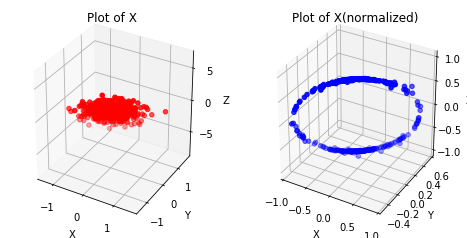

In [213]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pts = X.transpose()
x,y,z = zip(*pts)
fig = plt.figure(figsize=plt.figaspect(0.5))
#fig, (ax,ax2) = plt.subplots(2, 1, constrained_layout=True,projection='3d')
ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.set_title("Plot of X")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#fig2 = plt.figure()
ax2 = fig.add_subplot(1,2,2, projection='3d')
pts2 = Xn.transpose()
x2,y2,z2 = zip(*pts2)
ax2.scatter(x2, y2, z2, c='b', marker='o')
ax2.set_title("Plot of X(normalized)")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

In [226]:
#Reconstructing Denoised Data using PCA
U,s,VT = lg.svd(Xn)
Unew = U[:,0:2]
U2 = Unew.dot(Unew.transpose())
Xdn = U2.dot(Xn)

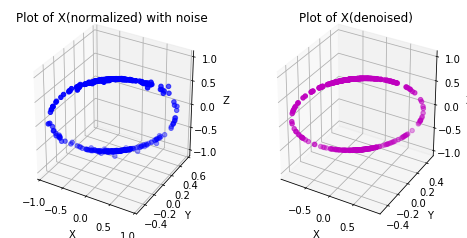

In [216]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pts = Xn.transpose()
x,y,z = zip(*pts)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')
ax.set_title("Plot of X(normalized) with noise")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#fig2 = plt.figure()
ax2 = fig.add_subplot(1,2,2, projection='3d')
pts2 = Xdn.transpose()
x2,y2,z2 = zip(*pts2)
ax2.scatter(x2, y2, z2, c='m', marker='o')
ax2.set_title("Plot of X(denoised)")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

In [217]:
print("The representation error is: ",lg.norm(Xdn-Xn)**2)
print("The square of the smallest singular value is: ", s[2]**2)

The representation error is:  0.11755159022127393
The square of the smallest singular value is:  0.11755159022127386


## Real Data

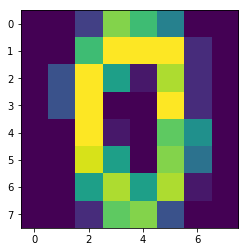

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random
images, labels = load_digits(1, return_X_y=True)

r = random.randint(0,images.shape[0])
img = np.reshape(images[r],(8,8))
plt.imshow(img)

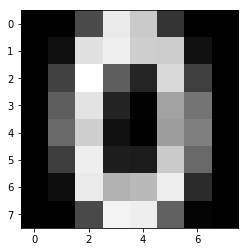

In [225]:
Imgs = images.transpose()
m = np.mean(Imgs,axis=1)
#get mean vector
m = np.reshape(m,(64,1))

#plot mean image
m_img = np.reshape(m,(8,8))
plt.imshow(m_img,cmap='gray')

#mean centered data
Xbar = Imgs - m

Text(0,0.5,'Y (log scale)')

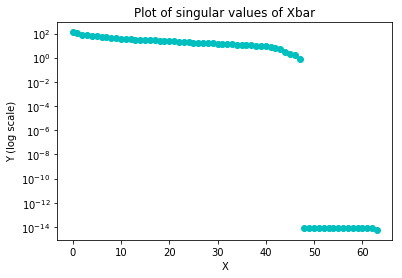

In [220]:
%matplotlib inline
U,s,VT = lg.svd(Xbar)
fig = plt.figure()
x = np.arange(s.shape[0])
y = s
ax = fig.add_subplot(111)
plt.yscale('log')
ax.scatter(x, y, c='c', marker='o')
ax.set_title("Plot of singular values of Xbar")
ax.set_xlabel('X')
ax.set_ylabel('Y (log scale)')

In [221]:
#finding smallest k to encompass 90% of data
s_sum = 0
fnorm = lg.norm(Xbar)**2

k = 0
for i in range(s.shape[0]):
    s_sum = s_sum + s[i]**2
    t = s_sum/fnorm
    if(t >= 0.9):
        k = i
        break
#top k principal components of Xbar

print("k is: ",k)

k is:  17


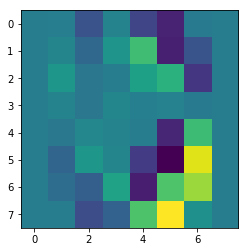

In [193]:
Uk = U[:,0:k]

img_pc1 = np.reshape(U[:,1],(8,8))
plt.imshow(img_pc1)

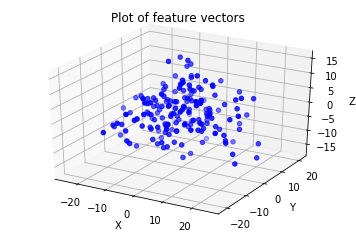

In [222]:
U3 = Uk[:,0:3]
Xtilda = U3.transpose().dot(Xbar)

pts = Xtilda.transpose()
x,y,z = zip(*pts)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')
ax.set_title("Plot of feature vectors")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

(64, 178)
The representation error is:  36050.010605737116
The sum of the squares of the smallest singular values is:  36050.01060573713


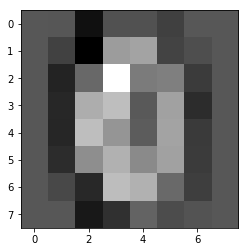

In [223]:
#Reconstruct images using first 3 PCs
Xhat = U3.dot(Xtilda)
print(Xhat.shape)
print("The representation error is: ",lg.norm(Xhat-Xbar)**2)
sums = 0
for i in range(3,U.shape[1]):
    sums+=s[i]**2
print("The sum of the squares of the smallest singular values is: ", sums)

img_r = np.reshape(Xhat[:,r],(8,8))
plt.imshow(img_r,cmap='gray')